In [1]:
# MNIST dataset of handwritten digits
from keras.datasets import mnist

# Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import RMSprop

# Preprocessing
from keras.utils import to_categorical

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

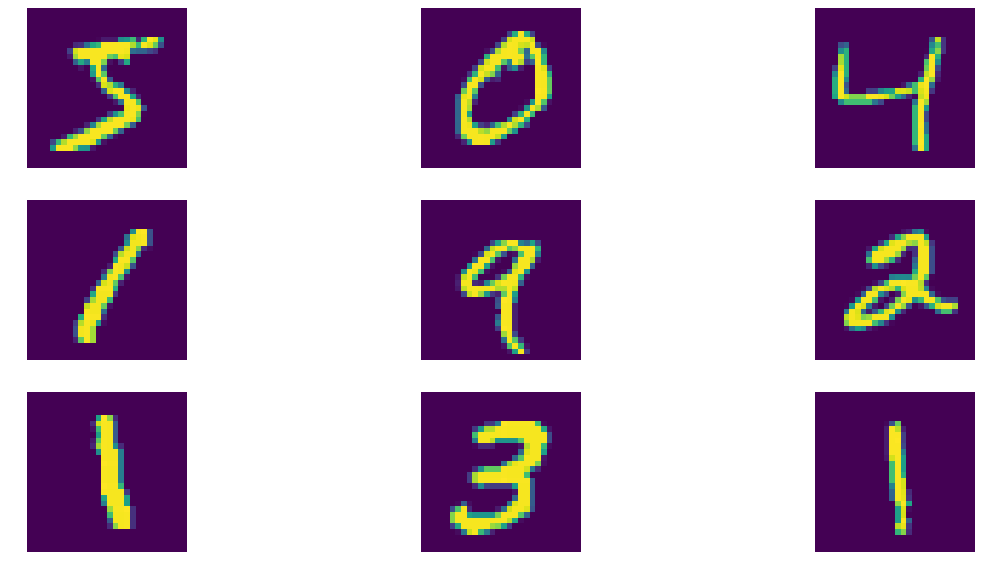

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axes = axes.flat

for i in range(9):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')

In [4]:
X_train = X_train.reshape((60000,28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
def get_model():
    model = Sequential()
    
    model.add(Conv2D(64, 
                     kernel_size=(3, 3), 
                     activation='relu', 
                     input_shape=(28, 28, 1)))
    
    model.add(Conv2D(128, 
                     (3,3), 
                     activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    
    model.add(Dense(256, 
                    activation='relu'))
    
    model.add(Dropout(0.4))
    
    model.add(Dense(10, 
                    activation='softmax'))
    
    model.compile(optimizer=RMSprop(lr=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [6]:
model = get_model()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [7]:
history = model.fit(X_train,
                    y_train,
                    epochs=15,
                    batch_size=1000,
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 112us/step - loss: 9.4529 - acc: 0.3618 - val_loss: 0.2022 - val_acc: 0.9371
Epoch 2/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.1963 - acc: 0.9404 - val_loss: 0.0709 - val_acc: 0.9781
Epoch 3/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.1135 - acc: 0.9676 - val_loss: 0.0432 - val_acc: 0.9851
Epoch 4/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.0669 - acc: 0.9793 - val_loss: 0.0427 - val_acc: 0.9868
Epoch 5/15
60000/60000 [==============================] - 3s 56us/step - loss: 0.0636 - acc: 0.9819 - val_loss: 0.0377 - val_acc: 0.9882
Epoch 6/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.0450 - acc: 0.9865 - val_loss: 0.0353 - val_acc: 0.9891
Epoch 7/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.0395 - acc: 0.9880 - val_loss: 0.0415 - val_ac

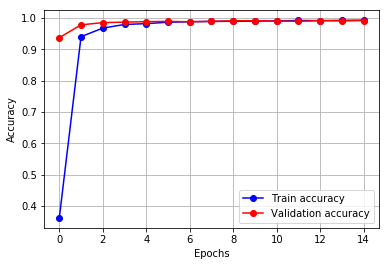

In [8]:
x = range(15)

plt.grid(True)

plt.plot(x, 
         history.history['acc'], 
         'bo-', 
         label='Train accuracy')

plt.plot(x, 
         history.history['val_acc'],
         'ro-',
         label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

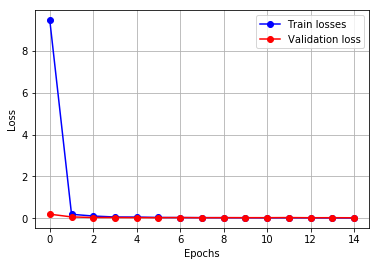

In [9]:
plt.grid(True)

plt.plot(x, 
         history.history['loss'], 
         'bo-', 
         label='Train losses')

plt.plot(x, 
         history.history['val_loss'],
         'ro-',
         label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc='upper right')

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Testing loss:', score[0])
print('Testing accuracy:', score[1])

Testing loss: 0.03102047740665148
Testing accuracy: 0.9918
